The scikit-learn classifiers are considered on the problem of classification of Fisher-Anderson irises, the description of which is given in the form of a set of data on 150 iris specimens, 50 specimens from the following three types (Fig. 1):

iris setosa;
iris versicolor;
iris virginica.

In [14]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Все переменные должны быть в одном масштабе перед применением PCA, в противном случае функция с большими значениями будет доминировать в результате. Ниже я используюStandardScalerв scikit-learn стандартизировать функции набора данных в единичном масштабе (среднее = 0 и дисперсия = 1).

In [4]:
from sklearn.preprocessing import StandardScaler
variables = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
x = df.loc[:, variables].values
y = df.loc[:,['class']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)

Стандартизированные функции

Есть четыре особенности в исходных данных. Таким образом, PCA предоставит такое же количество основных компонентов.

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


Основные компоненты для набора данных IRIS
Какие различия объясняются каждым из основных компонентов? использованиеpca.explained_variance_ratio_вернуть вектор дисперсии:

Он показывает, что первый основной компонент составляет 72,22% дисперсии, второй, третий и четвертый - 23,9%, 3,68% и 0,51% соответственно. Можно сказать, что 72,22 + 23,9 = 96,21% информации собираются первыми и вторыми основными компонентами. Мы часто хотим оставить только существенные черты и отбросить незначительные. Основное правило заключается в том, чтобы сохранить главные главные компоненты, которые улавливают значительную дисперсию, и игнорировать мелкие.

In [6]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523 0.03683832 0.00515193]


Мы можем построить результаты, используя первые два компонента. Давайте добавим целевую переменную y к новым данным x_pca:

In [7]:
x_pca['class']=y
x_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4','class']
x_pca.head()

,PC1,PC2,PC3,PC4,class
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


Результат показывает, что данные отделимы в новом пространстве.

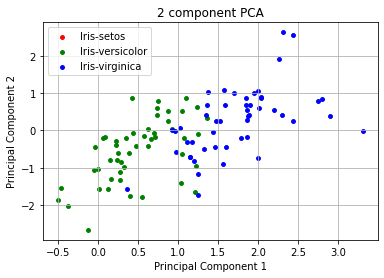

<Figure size 7200x3600 with 0 Axes>

In [90]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['Iris-setos', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
 indicesToKeep = x_pca['class'] == target
 ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
 , x_pca.loc[indicesToKeep, 'PC2']
 , c = color
 , s = 15)
ax.legend(targets)
ax.grid()

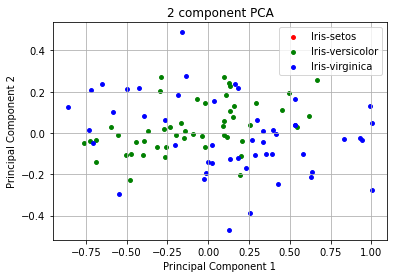

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['Iris-setos', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
 indicesToKeep = x_pca['class'] == target
 ax.scatter(x_pca.loc[indicesToKeep, 'PC3']
 , x_pca.loc[indicesToKeep, 'PC4']
 , c = color
 , s = 15)
ax.legend(targets)
ax.grid()

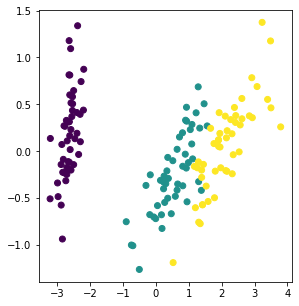

In [17]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
iris = load_iris()

X_pca = PCA().fit_transform(iris.data)
plt.figure(figsize=(10, 5))

plt.subplot(122)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)

Performing the Multiple Linear Regression
Once you added the data into Python, you may use both sklearn to get the regression results.

In [15]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

X=df[['sepal-length', 'sepal-width', 'petal-length']]
Y = df['petal-width']

In [18]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
pc1 = 4.6
pc2 = 3.1
pc3 = 1.5

print ('Predicted : \n', regr.predict([[pc1 ,pc2, pc3]]))

Intercept: 
 -0.248723586024455
Coefficients: 
 [-0.21027133  0.22877721  0.52608818]
Predicted : 
 [0.28236993]


///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [1]:
from sklearn.datasets import load_iris #data are loaded 
irisData=load_iris()
from matplotlib import pyplot as plt # replace the name "pyplot" by "plt" 
X=irisData.data
Y=irisData.target
x=0
y=1


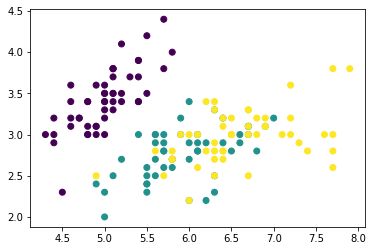

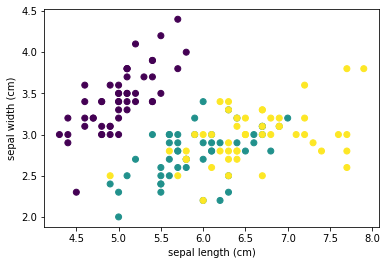

In [4]:
plt.scatter(X[:, x], X[:, y],c=Y) # all the functions defined in a given library should be prefixed by the name of the library
plt.show()
#if you want to know more about "scatter", you can type "help(plt.scatter)"
plt.xlabel(irisData.feature_names[x])
plt.ylabel(irisData.feature_names[y])
plt.scatter(X[:, x], X[:, y],c=Y)
plt.show()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 

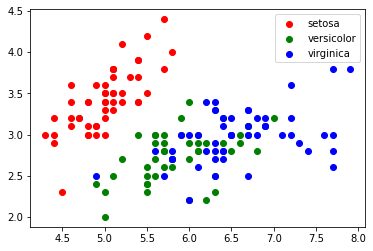

In [5]:
print(Y==0)
print(X[Y==0])
print(X[Y==0][:, x])
plt.scatter(X[Y==0][:, x],X[Y==0][:, y], color="red",label=irisData.target_names[0])
plt.scatter(X[Y==1][:, x],X[Y==1][:, y], color="green",label=irisData.target_names[1])
plt.scatter(X[Y==2][:, x],X[Y==2][:, y], color="blue",label=irisData.target_names[2])
plt.legend()
plt.show()

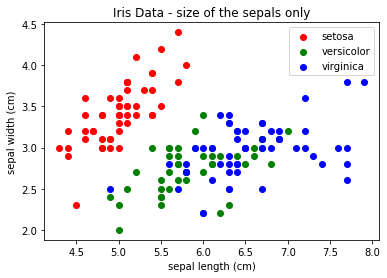

In [6]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
irisData=load_iris()
X=irisData.data
Y=irisData.target
x=0 
y=1
colors=["red","green","blue"]
for i in range(3):
	plt.scatter(X[Y==i][:, x],X[Y==i][:,y],color=colors[i],label=irisData.target_names[i])
plt.legend()
plt.xlabel(irisData.feature_names[x]) 
plt.ylabel(irisData.feature_names[y])
plt.title("Iris Data - size of the sepals only") 
plt.show()

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
dataset = pd.read_csv('Iris.csv')
x = dataset.iloc[:, [1, 2, 3, 4]].values

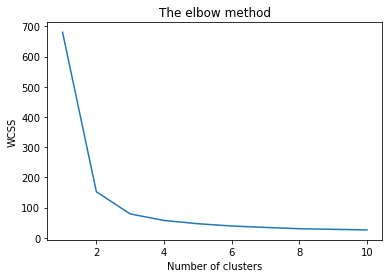

In [19]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [20]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

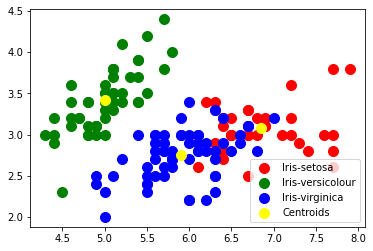

In [27]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()